In [1]:
import utils as ut

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
%matplotlib inline

In [4]:
file_to_read = ut.os.path.join(ut.DATA_DIR, 'cleaned_train.tsv')
df_train_without_na = ut.pd.read_table(file_to_read, encoding='utf-8', \
                                    sep="\t")

In [5]:
df_cleaned = df_train_without_na.copy()

In [6]:
df_cleaned['tag'] = \
    df_train_without_na['tag'].apply(ut.change_string_to_int_list)

In [7]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [8]:
tag_distribution = ut.get_distribution(df_cleaned['tag'])

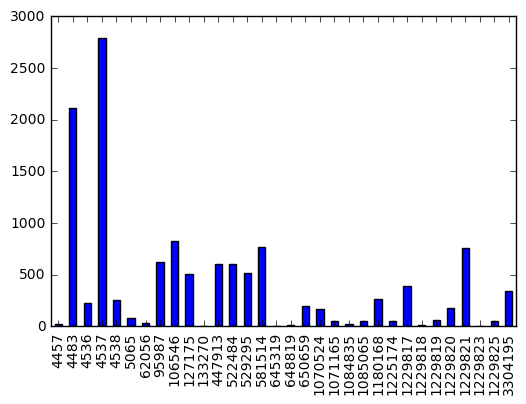

In [9]:
tag_distribution.plot.bar()

<b>Disparity in data</b>

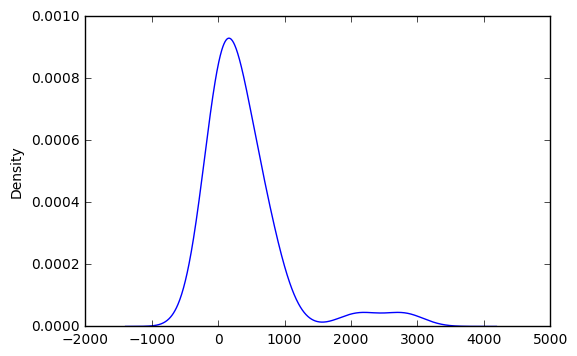

In [10]:
tag_distribution.plot.density()

<b>Left skewed- right tail</b>

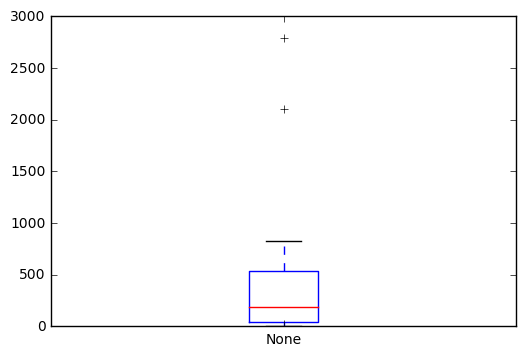

In [11]:
tag_distribution.plot.box()

<b>Many outliers</b>

## Deciding baseline for algorithm evaluation

In [12]:
(tag_distribution / df_cleaned.shape[0] * 100)

4457        0.208195
4483       19.948898
4536        2.167124
4537       26.440806
4538        2.365856
5065        0.757074
62056       0.274439
95987       5.857859
106546      7.807325
127175      4.816883
133270      0.028390
447913      5.744298
522484      5.706445
529295      4.902054
581514      7.296300
645319      0.028390
648819      0.104098
650659      1.845368
1070524     1.599319
1071165     0.482635
1084835     0.198732
1085065     0.482635
1180168     2.536198
1225174     0.501561
1229817     3.681272
1229818     0.151415
1229819     0.567805
1229820     1.656099
1229821     7.201666
1229823     0.028390
1229825     0.473171
3304195     3.264881
dtype: float64

<b>The class 4537 has 26% of the records in it. So if I were to build a model that predicts that given item always belongs to class 4537 it will be 26% of time correct. But an object belongs to more than one class so deciding the baseline on this basis is not a good way.</b>

# Correlation

In [13]:
dummy_item_class_id = ut.pd.get_dummies(df_cleaned['Item Class ID'])
dummy_item_class_id.columns = 'IC_id_' + dummy_item_class_id.columns
dummy_item_class_id.shape

(10567, 24)

In [14]:
mlb = MultiLabelBinarizer()
t = mlb.fit_transform(df_cleaned['tag'])

In [15]:
dummy_tags = ut.pd.DataFrame(t, columns=mlb.classes_)
dummy_tags.columns = ['tag_' + str(e) for e in dummy_tags.columns]
dummy_tags.shape

(10567, 32)

In [16]:
df_dummy = ut.pd.concat([dummy_item_class_id, dummy_tags], axis=1)
df_dummy.shape

(10567, 56)

In [17]:
df_corr = df_dummy.corr()

In [21]:
df_corr

,IC_id_1,IC_id_11,IC_id_19,IC_id_2,IC_id_21,IC_id_22,IC_id_24,IC_id_29,IC_id_3,IC_id_4,IC_id_46,IC_id_47,IC_id_5,IC_id_50,IC_id_51,IC_id_52,IC_id_58,IC_id_59,IC_id_61,IC_id_62,IC_id_64,IC_id_E,IC_id_J,IC_id_M,tag_4457,tag_4483,tag_4536,tag_4537,tag_4538,tag_5065,tag_62056,tag_95987,tag_106546,tag_127175,tag_133270,tag_447913,tag_522484,tag_529295,tag_581514,tag_645319,tag_648819,tag_650659,tag_1070524,tag_1071165,tag_1084835,tag_1085065,tag_1180168,tag_1225174,tag_1229817,tag_1229818,tag_1229819,tag_1229820,tag_1229821,tag_1229823,tag_1229825,tag_3304195
IC_id_1,1.000000,-0.015736,-0.848118,-0.098988,-0.042422,-0.017595,-0.017595,-0.049848,-0.109423,-0.074105,-0.026104,-0.007867,-0.060076,-0.073680,-0.011126,-0.017595,-0.013627,-0.007867,-0.015736,-0.056315,-0.082939,-0.007867,-0.011126,-0.007867,0.039498,0.029320,-0.073831,0.114241,-0.087676,-0.070630,-0.001724,0.122196,0.188159,0.116382,-0.013627,-0.156379,0.266662,-0.134295,0.145242,-0.002139,0.033917,-0.080679,-0.032122,-0.025595,-0.023047,-0.028387,-0.057814,-0.021796,-0.152953,-0.026513,-0.061109,-0.101906,-0.210301,-0.013627,-0.044476,-0.133315
IC_id_11,-0.015736,1.000000,-0.020409,-0.002382,-0.001021,-0.000423,-0.000423,-0.001200,-0.002633,-0.001783,-0.000628,-0.000189,-0.001446,-0.001773,-0.000268,-0.000423,-0.000328,-0.000189,-0.000379,-0.001355,-0.001996,-0.000189,-0.000268,-0.000189,-0.000889,0.038982,-0.002896,-0.011667,-0.003029,-0.001700,-0.001021,-0.004854,-0.005663,-0.004378,-0.000328,-0.004804,-0.004787,-0.004418,-0.005459,-0.000328,-0.000628,-0.002668,-0.002481,-0.001355,-0.000868,-0.001355,-0.003139,-0.001382,-0.003804,-0.000758,-0.001471,-0.002525,-0.005421,-0.000328,-0.001342,-0.003575
IC_id_19,-0.848118,-0.020409,1.000000,-0.128382,-0.055018,-0.022819,-0.022819,-0.064650,-0.141915,-0.096110,-0.033856,-0.010203,-0.077915,-0.095558,-0.014430,-0.022819,-0.017674,-0.010203,-0.020409,-0.073038,-0.107568,-0.010203,-0.014430,-0.010203,-0.031276,-0.098233,0.074240,-0.079270,0.103542,-0.091603,0.006555,-0.127675,-0.160419,-0.094346,0.016068,0.088805,-0.230233,0.152414,-0.104076,0.004821,-0.027980,0.096947,0.012805,0.011719,0.012765,0.033591,0.077882,0.032827,0.179360,0.032257,0.072052,0.119277,0.250226,0.016068,0.054699,0.160240
IC_id_2,-0.098988,-0.002382,-0.128382,1.000000,-0.006421,-0.002663,-0.002663,-0.007546,-0.016564,-0.011218,-0.003952,-0.001191,-0.009094,-0.011153,-0.001684,-0.002663,-0.002063,-0.001191,-0.002382,-0.008525,-0.012555,-0.001191,-0.001684,-0.001191,-0.005591,-0.049326,-0.018219,-0.066273,-0.019055,-0.010691,-0.006421,0.146560,-0.012224,-0.009214,-0.002063,0.266539,-0.016582,-0.027792,-0.034341,-0.002063,-0.003952,-0.016784,-0.015606,-0.008525,-0.005462,-0.008525,-0.019746,-0.008691,-0.023931,-0.004767,-0.009250,-0.009736,-0.034101,-0.002063,-0.008440,-0.022488
IC_id_21,-0.042422,-0.001021,-0.055018,-0.006421,1.000000,-0.001141,-0.001141,-0.003234,-0.007098,-0.004807,-0.001693,-0.000510,-0.003897,-0.004780,-0.000722,-0.001141,-0.000884,-0.000510,-0.001021,-0.003653,-0.005380,-0.000510,-0.000722,-0.000510,-0.002396,0.005499,0.066732,0.017769,0.003736,-0.004582,-0.002752,-0.013086,-0.001781,-0.011801,-0.000884,-0.012950,-0.005107,-0.011910,-0.007762,-0.000884,-0.001693,-0.007193,0.007732,-0.003653,-0.002341,0.022448,-0.008462,-0.003725,-0.010256,-0.002043,-0.003964,-0.006808,-0.014614,-0.000884,-0.003617,-0.009637
IC_id_22,-0.017595,-0.000423,-0.022819,-0.002663,-0.001141,1.000000,-0.000473,-0.001341,-0.002944,-0.001994,-0.000702,-0.000212,-0.001616,-0.001982,-0.000299,-0.000473,-0.000367,-0.000212,-0.000423,-0.001515,-0.002232,-0.000212,-0.000299,-0.000212,-0.000994,0.021806,-0.003238,0.006689,-0.003387,-0.001900,-0.001141,-0.005427,-0.006332,-0.004895,-0.000367,-0.005371,-0.005352,-0.004940,-0.006104,-0.000367,-0.000702,-0.002983,-0.002774,-0.001515,-0.000971,-0.001515,-0.003510,-0.001545,-0.004254,-0.000847,-0.001644,-0.002823,-0.006061,-0.000367,-0.001500,-0.003997
IC_id_24,-0.017595,-0.000423,-0.022819,-0.002663,-0.001141,-0.000473,1.0000